In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

In [2]:
# Load and preprocess CIFAR-10 data
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

In [3]:
# Convert labels to categorical for multi-class classification
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

In [4]:
def build_alexnet():
    model = models.Sequential([
        layers.Input(shape=(32, 32, 3)),  # Use `input_shape` in the first layer
        layers.Resizing(224, 224),  # Resize input images to 224x224
        layers.Conv2D(96, (11, 11), strides=4, activation='relu'),
        layers.MaxPooling2D((3, 3), strides=2),
        layers.Conv2D(256, (5, 5), activation='relu', padding='same'),
        layers.MaxPooling2D((3, 3), strides=2),
        layers.Conv2D(384, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(384, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((3, 3), strides=2),
        layers.Flatten(),
        layers.Dense(4096, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(4096, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])
    return model

# Compile AlexNet
alexnet_model = build_alexnet()
alexnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train AlexNet
history_alexnet = alexnet_model.fit(
    train_images, train_labels, 
    epochs=6, 
    batch_size=32, 
    validation_split=0.3
)



Epoch 1/6
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 4144s 4s/step - accuracy: 0.1018 - loss: 2.5072 - val_accuracy: 0.0984 - val_loss: 2.3029
Epoch 2/6
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 1874s 2s/step - accuracy: 0.0978 - loss: 2.3031 - val_accuracy: 0.1005 - val_loss: 2.3028
Epoch 3/6
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 1848s 2s/step - accuracy: 0.1015 - loss: 2.3027 - val_accuracy: 0.1005 - val_loss: 2.3030
Epoch 4/6
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 1841s 2s/step - accuracy: 0.0986 - loss: 2.3030 - val_accuracy: 0.0983 - val_loss: 2.3027
Epoch 5/6
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 1845s 2s/step - accuracy: 0.0963 - loss: 2.3027 - val_accuracy: 0.0979 - val_loss: 2.3028
Epoch 6/6
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 1847s 2s/step - accuracy: 0.0987 - loss: 2.3027 - val_accuracy: 0.0979 - val_loss: 2.3027


In [5]:
# Evaluate AlexNet
alexnet_test_loss, alexnet_test_acc = alexnet_model.evaluate(test_images, test_labels, verbose=2)
print(f"AlexNet Test Accuracy: {alexnet_test_acc * 100:.2f}%")

313/313 - 274s - 874ms/step - accuracy: 0.1000 - loss: 2.3026
AlexNet Test Accuracy: 10.00%


In [7]:
def build_mobilenet(input_size=(128, 128)):  # Smaller input size
    base_model = MobileNetV2(weights=None, include_top=False, input_shape=(*input_size, 3))
    model = models.Sequential([
        layers.Input(shape=(32, 32, 3)),
        layers.Resizing(input_size[0], input_size[1]),  # Resize to 128x128
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(10, activation='softmax')
    ])
    return model

# Compile MobileNetV2
mobilenet_model = build_mobilenet()
mobilenet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train with fewer epochs to save time
history_mobilenet = mobilenet_model.fit(
    train_images, train_labels, 
    epochs=6,  # Reduced epochs
    batch_size=64, 
    validation_split=0.3
)


Epoch 1/6
547/547 ━━━━━━━━━━━━━━━━━━━━ 2003s 3s/step - accuracy: 0.3374 - loss: 1.8054 - val_accuracy: 0.0984 - val_loss: 2.5068
Epoch 2/6
547/547 ━━━━━━━━━━━━━━━━━━━━ 1874s 3s/step - accuracy: 0.5818 - loss: 1.1844 - val_accuracy: 0.1014 - val_loss: 2.9790
Epoch 3/6
547/547 ━━━━━━━━━━━━━━━━━━━━ 988s 2s/step - accuracy: 0.6642 - loss: 0.9472 - val_accuracy: 0.1014 - val_loss: 3.3349
Epoch 4/6
547/547 ━━━━━━━━━━━━━━━━━━━━ 925s 2s/step - accuracy: 0.7238 - loss: 0.7812 - val_accuracy: 0.1014 - val_loss: 3.5182
Epoch 5/6
547/547 ━━━━━━━━━━━━━━━━━━━━ 740s 1s/step - accuracy: 0.7709 - loss: 0.6567 - val_accuracy: 0.1014 - val_loss: 3.6722
Epoch 6/6
547/547 ━━━━━━━━━━━━━━━━━━━━ 733s 1s/step - accuracy: 0.8035 - loss: 0.5647 - val_accuracy: 0.1014 - val_loss: 4.0797


In [13]:
# Evaluate MobileNetV2 on the test dataset
mobilenet_test_loss, mobilenet_test_acc = mobilenet_model.evaluate(test_images, test_labels, verbose=2)
print(f"MobileNetV2 Test Accuracy: {mobilenet_test_acc * 100:.2f}%")


313/313 - 38s - 123ms/step - accuracy: 0.1000 - loss: 4.0721
MobileNetV2 Test Accuracy: 10.00%


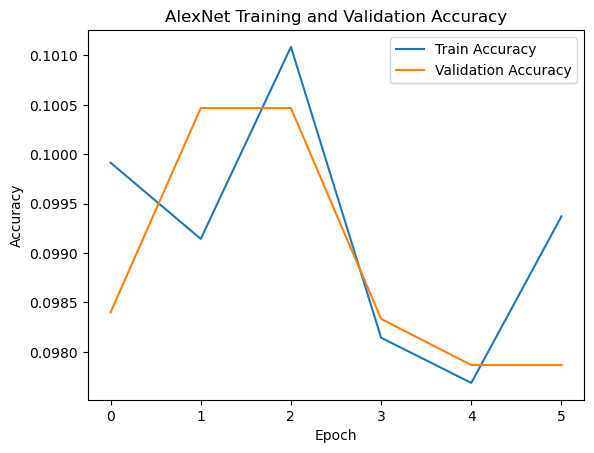

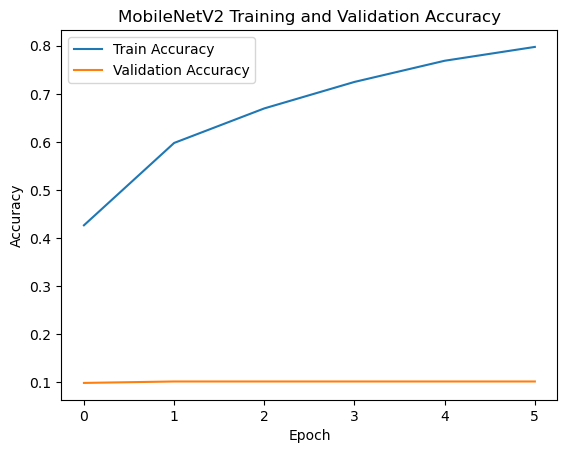

In [15]:
# Function to plot training history
def plot_history(history, title):
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# Plot accuracy for AlexNet and MobileNetV2
plot_history(history_alexnet, "AlexNet Training and Validation Accuracy")
plot_history(history_mobilenet, "MobileNetV2 Training and Validation Accuracy")
